In [16]:
import numpy as np
from scipy.optimize import minimize

# Sample numbers, somewhat loggy
x = np.array([10, 8, 9, 4, 6, 1, 3])
y = np.array([0.9, 0.85, 0.88, 0.5, 0.7, .1, .2])


# Use of a three parameter model here sets the min at zero.
def formula(X, A, B, C):
    return A / (1 + (X / C)**B)


def formula_inverted(Y_mid, A, B, C):
    return (A / Y_mid - 1)**(1/B) * C


def RSS(init_params):
    predictions = formula(x, *init_params)
    return sum((y - predictions)**2)

#TODO: create a method for determining these based on the data. E.g. max value can be the maximum observed value from x.
initial_predictions = np.array([1, -1.5, 400])

# Using the scipy minimize function to optimize from initial predicted parameters. 
result = minimize(RSS, initial_predictions, method='Powell')
fitted_params = result.x

model_predictions = formula(x, *fitted_params)

# Calculation of accuracy-based metrics
abs_error = y - model_predictions
std_err = np.square(abs_error)
MSE = np.mean(std_err)
R2 = 1.0 - (np.var(abs_error) / np.var(y))

# Uses a very large number to find roughly the upper bound for Y. Can probably be improved mathematically. 
y_mean = formula(1000000, *fitted_params) / 2

ic50 = formula_inverted(y_mean, *fitted_params)

print(f'The IC50 occurs at {np.round(ic50, 2)} units of x. The R squared of the regression is {np.round(R2, 2)}.')


The IC50 occurs at 1041.42 units of x. The R squared of the regression is 0.94.


In [1]:
#create funciton for easy testing
def threePL(x, y):
    import numpy as np
    from scipy.optimize import minimize
    
    # Use of a three parameter model here sets the min at zero.
    def formula(X, D, B, C):
        return D / (1 + (X / C)**B)


    def formula_inverted(Y_mid, D, B, C):
        return (D / Y_mid - 1)**(1/B) * C


    def RSS(init_params):
        predictions = formula(x, *init_params)
        return sum((y - predictions)**2)

    #TODO: create a method for determining these based on the data. E.g. max value can be the maximum observed value from x.
    initial_predictions = np.array([1, -1.5, 400])

    # Using the scipy minimize function to optimize from initial predicted parameters. 
    result = minimize(RSS, initial_predictions, method='Powell')
    fitted_params = result.x

    model_predictions = formula(x, *fitted_params)

    # Calculation of accuracy-based metrics
    abs_error = y - model_predictions
    std_err = np.square(abs_error)
    MSE = np.mean(std_err)
    R2 = 1.0 - (np.var(abs_error) / np.var(y))

    # Uses a very large number to find roughly the upper bound for Y. Can probably be improved mathematically. 
    y_mean = formula(1000000, *fitted_params) / 2

    ic50 = formula_inverted(y_mean, *fitted_params)

    print(f'The IC50 occurs at {np.round(ic50, 2)} units of x. The R squared of the regression is {np.round(R2, 2)}.')

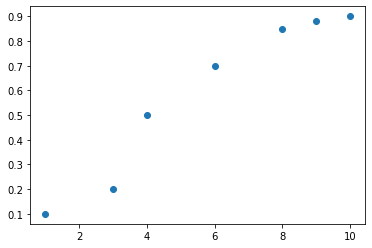

In [4]:
#examine data
import matplotlib.pyplot as plt

x = np.array([10, 8, 9, 4, 6, 1, 3])
y = np.array([0.9, 0.85, 0.88, 0.5, 0.7, .1, .2])

plt.scatter(x, y);

1 10 5 5


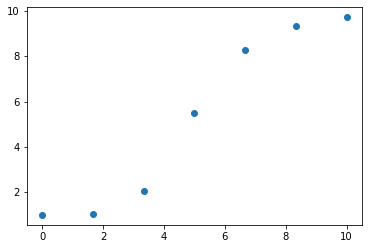

In [2]:
#Create function to generate log like data
import numpy as np
import matplotlib.pyplot as plt
'''
4pl equation:
y = D+(A-D)/(1+(x/C)^B)

x = c((a - d)/(y - d) - 1)**1/b

a = the minimum value that can be obtained (i.e. what happens at 0 dose)

d = the maximum value that can be obtained (i.e. what happens at infinite dose)

c = the point of inflection (i.e. the point on the S shaped curve halfway between a and d)

b = Hill’s slope of the curve (i.e. this is related to the steepness of the curve at point c).
'''
rng = np.random.RandomState(123)

a = 1
d = rng.randint(10, 12)
c = rng.randint(5, 6)
b = rng.randint(6)

x = np.linspace(0, 10 , 7)

y = d + ((a - d)/(1 + (x/c)**(b)))

plt.scatter(x, y);
print(a, d, c, b)

In [3]:
threePL(x, y)

The IC50 occurs at 820.03 units of x. The R squared of the regression is 0.93.


<ipython-input-1-2c4c1a4825be>:8: RuntimeWarning: divide by zero encountered in power
  return D / (1 + (X / C)**B)
